Generation 1/100, Best Fitness: 1.0870286226272583
Generation 2/100, Best Fitness: 1.0870286226272583
Generation 3/100, Best Fitness: 1.0126796960830688
Generation 4/100, Best Fitness: 1.0126796960830688
Generation 5/100, Best Fitness: 1.0126796960830688
Generation 6/100, Best Fitness: 1.0126796960830688
Generation 7/100, Best Fitness: 1.0126796960830688
Generation 8/100, Best Fitness: 1.0126796960830688
Generation 9/100, Best Fitness: 1.0126796960830688
Generation 10/100, Best Fitness: 1.0126796960830688
Generation 11/100, Best Fitness: 1.0126796960830688
Generation 12/100, Best Fitness: 0.9835453033447266
Generation 13/100, Best Fitness: 0.9835453033447266
Generation 14/100, Best Fitness: 0.9835453033447266
Generation 15/100, Best Fitness: 0.9835453033447266
Generation 16/100, Best Fitness: 0.9835453033447266
Generation 17/100, Best Fitness: 0.9835453033447266
Generation 18/100, Best Fitness: 0.9835453033447266
Generation 19/100, Best Fitness: 0.9835453033447266
Generation 20/100, Be

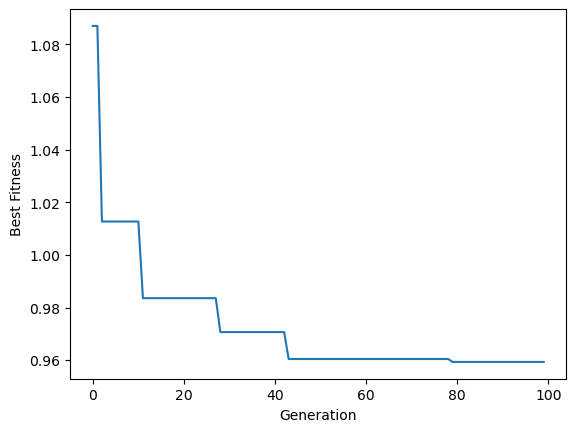

In [22]:
import torch
import torch.nn as nn
import random
import numpy as np
import matplotlib.pyplot as plt

# تعریف شبکه عصبی ساده
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# تابع هدف برای ارزیابی
def objective_function(nn, x, y):
    nn.eval()
    with torch.no_grad():
        y_pred = nn(x)
        loss = torch.mean((y - y_pred) ** 2)
    return loss.item()

# تنظیمات الگوریتم ژنتیک
input_size = 2
hidden_size = 5
output_size = 1
population_size = 30
generations = 100
mutation_rate = 0.01
crossover_rate = 0.7

# تولید داده‌های نمونه
x = torch.randn((100, input_size)).float()
y = torch.randn((100, output_size)).float()

# مقداردهی اولیه وزن‌ها
bounds = [(-1, 1)] * (input_size * hidden_size + hidden_size * output_size + hidden_size + output_size)

# تعریف کروموزوم
class Chromosome:
    def __init__(self, bounds):
        self.genes = np.array([random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))], dtype=np.float32)
        self.fitness = float('inf')

    def evaluate(self, nn, x, y):
        self.set_weights(nn)
        self.fitness = objective_function(nn, x, y)

    def set_weights(self, nn):
        idx = 0
        for param in nn.parameters():
            param_size = param.numel()
            param.data = torch.tensor(self.genes[idx:idx+param_size], dtype=torch.float32).reshape(param.size())
            idx += param_size

# مقداردهی اولیه جمعیت
#population = [Chromosome(bounds) for _ in range(population_size)]
population = []
for _ in range(population_size):
    population.append(Chromosome(bounds))

# انتخاب والدین
def select_parents(population):
    parents = random.choices(population, k=2, weights=[1/c.fitness for c in population])
    return parents

# تقاطع والدین
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1.genes) - 1)
        child1_genes = np.concatenate((parent1.genes[:point], parent2.genes[point:]))
        child2_genes = np.concatenate((parent2.genes[:point], parent1.genes[point:]))
    else:
        child1_genes = parent1.genes.copy()
        child2_genes = parent2.genes.copy()
    return Chromosome(bounds), Chromosome(bounds)

# جهش کروموزوم
def mutate(chromosome):
    for i in range(len(chromosome.genes)):
        if random.random() < mutation_rate:
            chromosome.genes[i] = random.uniform(bounds[i][0], bounds[i][1])

# الگوریتم ژنتیک
fitness_history = []
nn = SimpleNN(input_size, hidden_size, output_size).float()

for generation in range(generations):
    for chromosome in population:
        chromosome.evaluate(nn, x, y)

    population.sort(key=lambda c: c.fitness)
    fitness_history.append(population[0].fitness)
    print(f'Generation {generation+1}/{generations}, Best Fitness: {population[0].fitness}')

    new_population = population[:2]  # elitism: حفظ بهترین کروموزوم‌ها

    while len(new_population) < population_size:
        parent1, parent2 = select_parents(population)
        child1, child2 = crossover(parent1, parent2)
        mutate(child1)
        mutate(child2)
        new_population.append(child1)
        new_population.append(child2)

    population = new_population[:population_size]

# رسم نمودار
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.show()
